In [1]:
import numpy as np
import pandas as pd
#from stable_baselines3.ppo import MlpPolicy
#from stable_baselines3.common.env_checker import check_env
#from stable_baselines3 import PPO
import pickle
import os

import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
RESULT_PATH = '/scratch/wf541/outputs/2021-11-18/23-03-53'

In [24]:
results = [os.path.join(RESULT_PATH, pth) for pth in os.listdir(RESULT_PATH) if (not pth.endswith('.yaml')) and (not pth.startswith('.'))]

In [25]:
results

['/scratch/wf541/outputs/2021-11-18/23-03-53/rl_logs.json',
 '/scratch/wf541/outputs/2021-11-18/23-03-53/action_fn_logs.h5',
 '/scratch/wf541/outputs/2021-11-18/23-03-53/eval_path.pkl',
 '/scratch/wf541/outputs/2021-11-18/23-03-53/hydra_training_driver_ppo_dis.log',
 '/scratch/wf541/outputs/2021-11-18/23-03-53/reward_history.h5']

In [26]:
action_oos_eval_path = os.path.join(RESULT_PATH, 'action_fn_logs.h5')
action_eval_path = os.path.join(RESULT_PATH, 'eval_path.pkl')

In [27]:
oos_eval = pd.read_hdf(action_oos_eval_path)

In [28]:
oos_eval

,holdings,reward
0,-17,-0.000000
1,-17,-0.645325
2,-17,-8.050642
3,-17,-55.936392
4,-17,-1.970958
...,...,...
499995,-49,-0.511045
499996,-36,-0.002493
499997,-36,-0.006518
499998,-36,-0.049506


In [29]:
oos_eval['idx'] = np.repeat(np.arange(oos_eval.shape[0] // (50 * 10000)), 50 * 10000)

In [30]:
oos_eval

,holdings,reward,idx
0,-17,-0.000000,0
1,-17,-0.645325,0
2,-17,-8.050642,0
3,-17,-55.936392,0
4,-17,-1.970958,0
...,...,...,...
499995,-49,-0.511045,20
499996,-36,-0.002493,20
499997,-36,-0.006518,20
499998,-36,-0.049506,20


In [31]:
eval_path = pickle.load(open(action_eval_path, 'rb'))

In [32]:
eval_path

,episode_idx,randn,time_to_maturity,cum_randn,price,all_1,normalized_time,delta,call_price
0,0,0.496714,0.003968,0.496714,100.288355,1.0,0.02,0.530675,3.733329
1,0,-0.138264,0.007937,0.358450,100.208161,1.0,0.04,0.527114,3.683771
2,0,0.647689,0.011905,1.006138,100.575190,1.0,0.06,0.543336,3.873056
3,0,1.523030,0.015873,2.529168,101.445763,1.0,0.08,0.581375,4.355528
4,0,-0.234153,0.019841,2.295015,101.309552,1.0,0.10,0.575568,4.269587
...,...,...,...,...,...,...,...,...,...
499995,9999,1.333620,0.182540,-6.315671,96.419048,1.0,0.92,0.341836,1.711387
499996,9999,-0.109756,0.186508,-6.425427,96.357521,1.0,0.94,0.338518,1.683471
499997,9999,-0.243695,0.190476,-6.669122,96.222937,1.0,0.96,0.331785,1.631411
499998,9999,-0.797460,0.194444,-7.466581,95.787339,1.0,0.98,0.311208,1.484546


In [33]:
reward_history = oos_eval.groupby('idx').reward.median()

[]

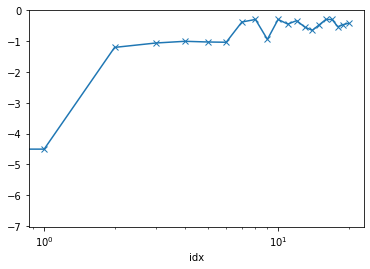

In [34]:
reward_history.plot(style='x-')
plt.semilogx()
#plt.xlim(100,)

In [145]:
eval_path[['holdings', 'reward']] = oos_eval.loc[oos_eval['idx'] == oos_eval['idx'].max(), ['holdings', 'reward']]

In [146]:
eval_path[['holdings', 'reward']] = oos_eval.loc[oos_eval['idx'] == 625, ['holdings', 'reward']]

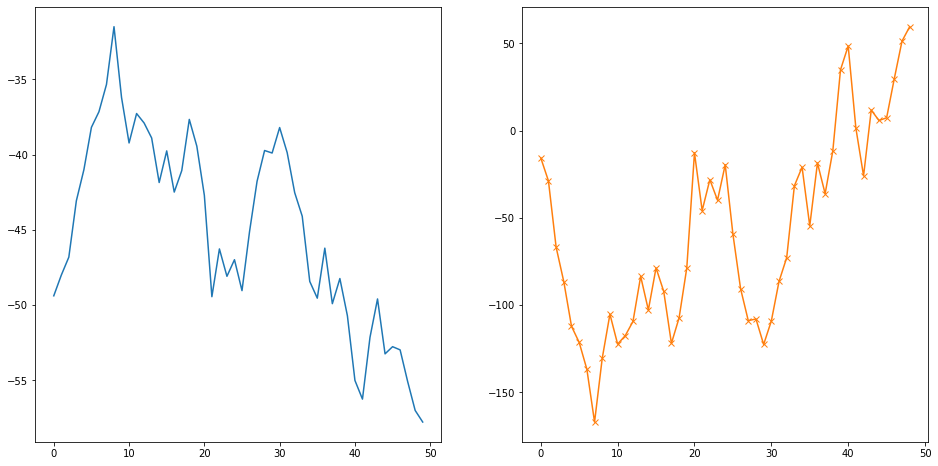

In [147]:
sample_experiment = eval_path.query('episode_idx==105')
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
axes[0].plot(np.arange(50), sample_experiment.delta * -100, '-')
axes[0].plot(np.arange(50), sample_experiment.holdings, '*-')
axes[1].plot(np.arange(50), ((sample_experiment['price'].shift(-1) - sample_experiment['price']) * sample_experiment['holdings']).cumsum(), 'v-')
axes[1].plot(np.arange(50), ((eval_path.query('episode_idx==105')['call_price'].shift(-1) - eval_path.query('episode_idx==105')['call_price']) * 100).cumsum(), 'x-')

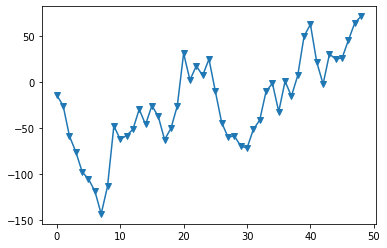

In [21]:
plt.plot(np.arange(50), ((sample_experiment['price'].shift(-1) - sample_experiment['price']) * sample_experiment['holdings']).cumsum() + ((eval_path.query('episode_idx==105')['call_price'].shift(-1) - 
    eval_path.query('episode_idx==105')['call_price']) * 100).cumsum(), 'v-')